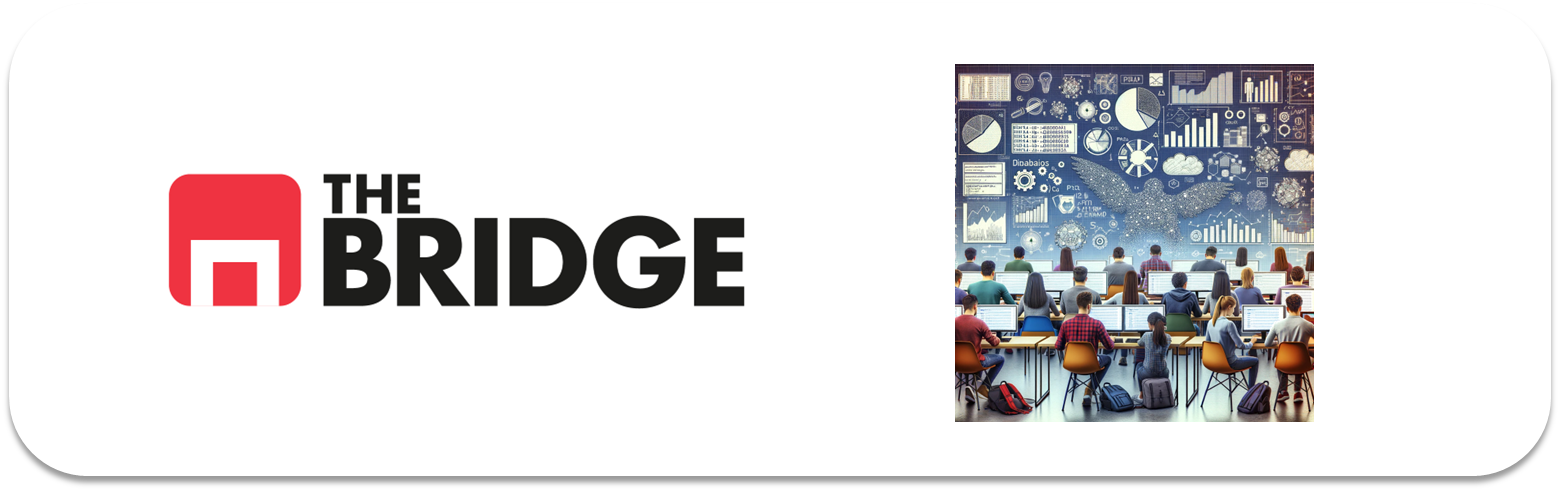

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

In [20]:
df_practica = pd.read_csv("./data//hard_to_find/obligatoria_hard.csv")
df = df_practica.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|DIS|RAD|TAX|PTRATIO|LSTAT|MEDV  506 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [21]:
# El dataset parece tener todas las columnas en una sola separadas por |
# Necesitaremos especificar el delimitador correcto

df = pd.read_csv("./data//hard_to_find/obligatoria_hard.csv")

df = df.iloc[:, 0].str.split("|", expand=True)

df.columns = [
    "CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS",
    "RAD","TAX","PTRATIO","LSTAT","MEDV"
]

df = df.astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


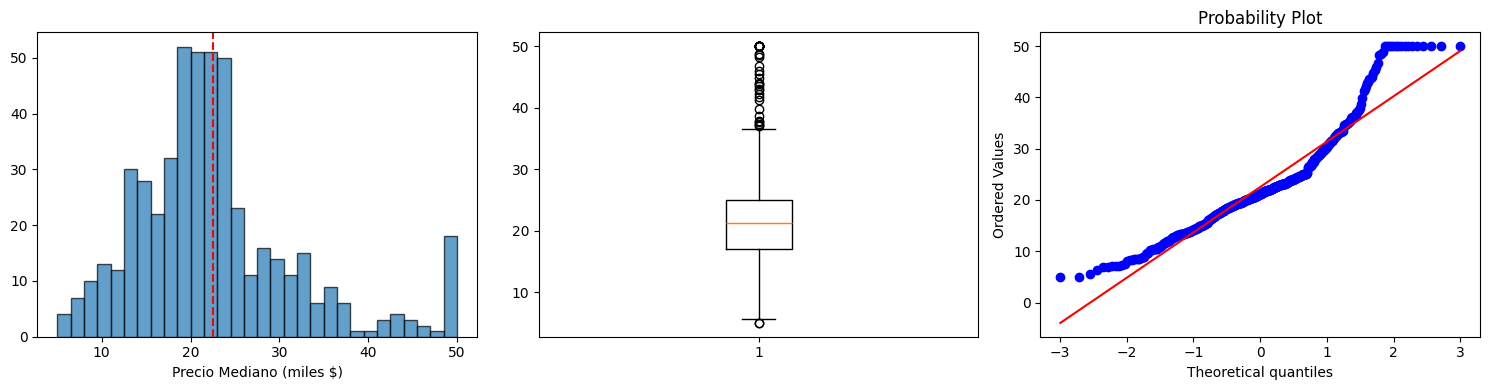

Media: 22.53k$ | Std: 9.20k$


In [22]:
target_col = 'MEDV'

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(df[target_col], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Precio Mediano (miles $)')
axes[0].axvline(df[target_col].mean(), color='red', linestyle='--')
axes[1].boxplot(df[target_col])
stats.probplot(df[target_col], dist="norm", plot=axes[2])
plt.tight_layout()
plt.savefig('01_analisis_target.png', dpi=300)
plt.show()

print(f"Media: {df[target_col].mean():.2f}k$ | Std: {df[target_col].std():.2f}k$")

In [23]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"Train: {train_df.shape[0]} | Test: {test_df.shape[0]}")

Train: 404 | Test: 102


In [24]:
X_train = train_df.drop(target_col, axis=1)
y_train = train_df[target_col]
X_test = test_df.drop(target_col, axis=1)
y_test = test_df[target_col]

print(f"X_train: {X_train.shape} | X_test: {X_test.shape}")

X_train: (404, 12) | X_test: (102, 12)


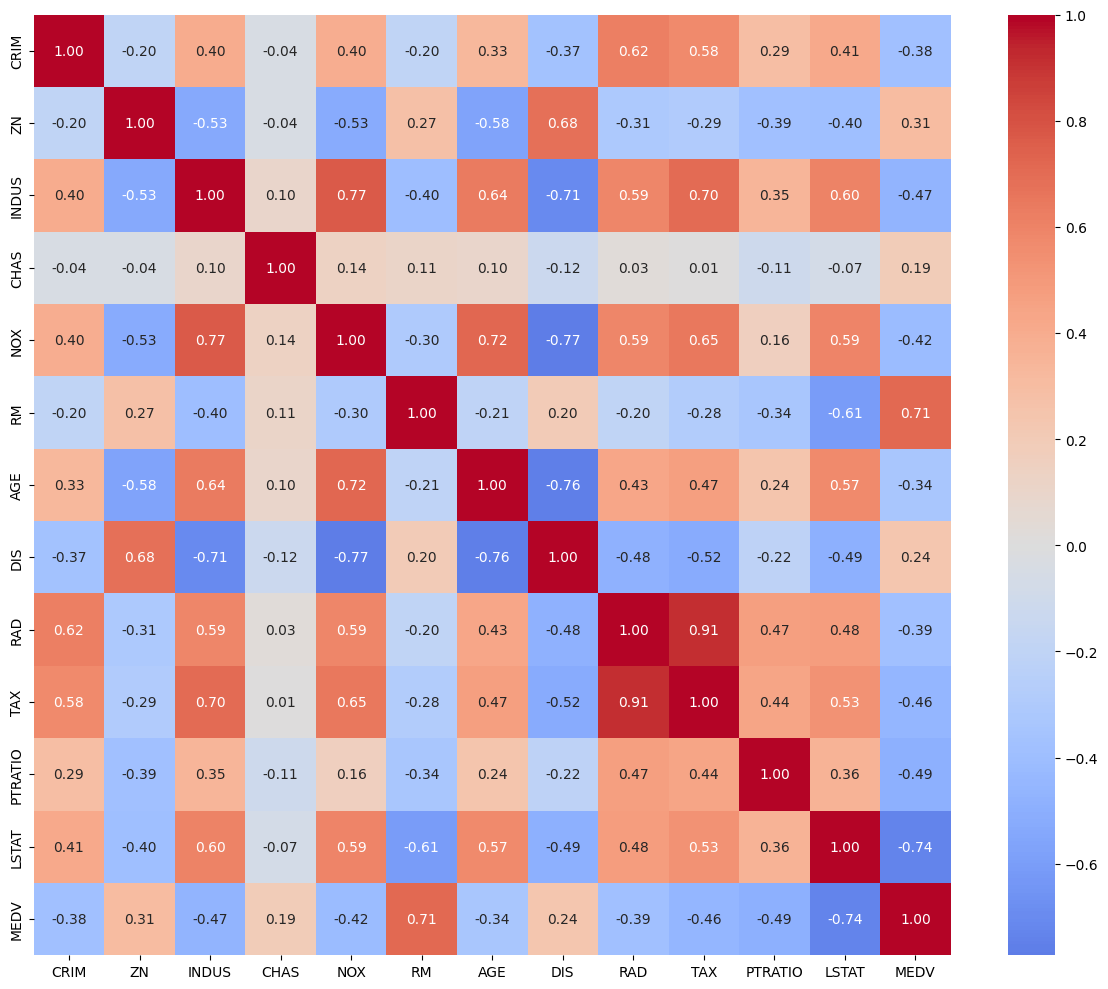


Correlaciones con MEDV:
MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64


In [25]:
correlation_matrix = train_df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax)
plt.tight_layout()
plt.savefig('02_matriz_correlacion.png', dpi=300)
plt.show()

correlations = correlation_matrix[target_col].sort_values(ascending=False)
print("\nCorrelaciones con MEDV:")
print(correlations)

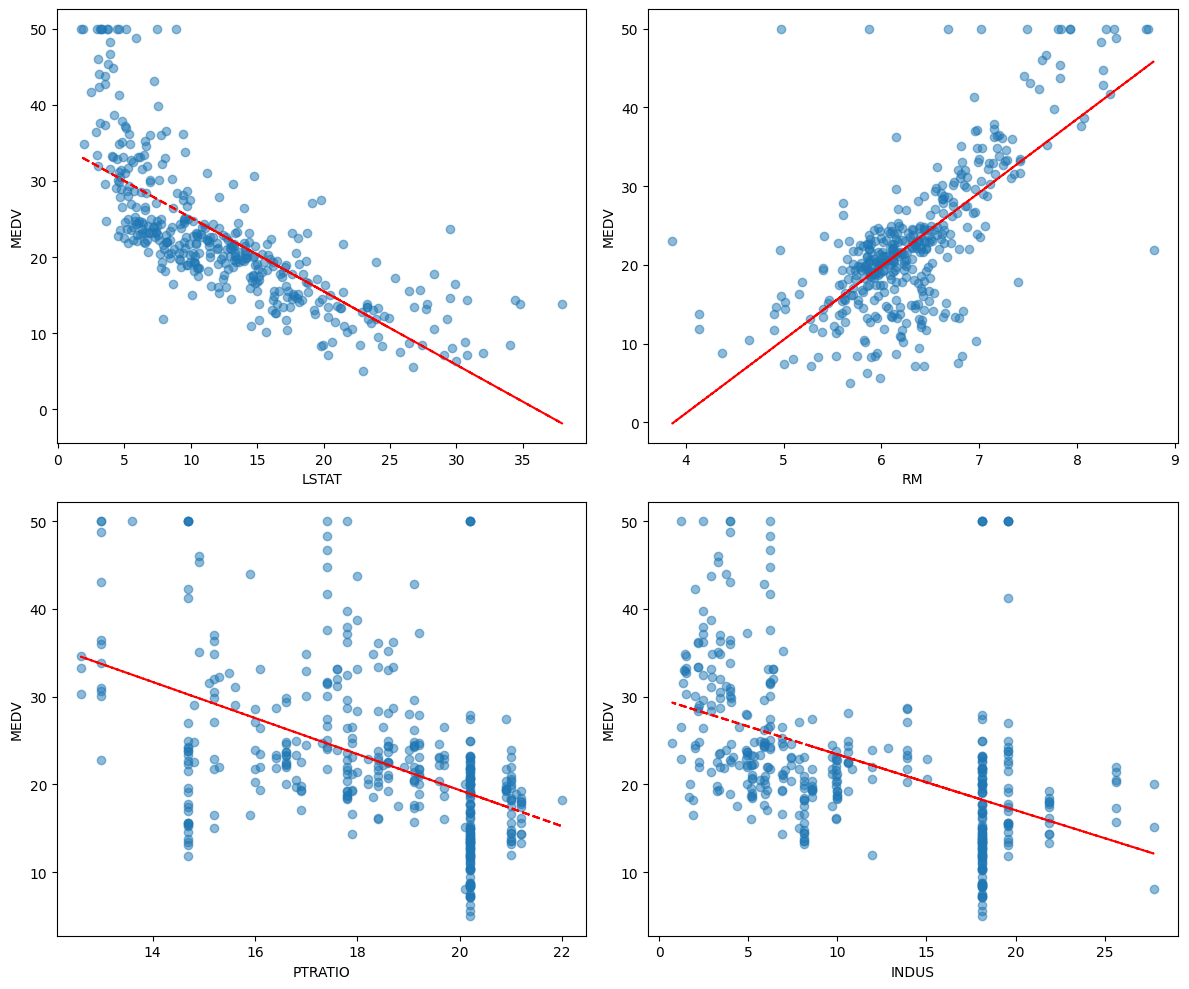

In [26]:
top_features = correlations[1:].abs().sort_values(ascending=False).head(4).index
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(train_df[feature], train_df[target_col], alpha=0.5)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('MEDV')
    z = np.polyfit(train_df[feature], train_df[target_col], 1)
    p = np.poly1d(z)
    axes[idx].plot(train_df[feature], p(train_df[feature]), "r--")
    
plt.tight_layout()
plt.savefig('04_top_features.png', dpi=300)
plt.show()

In [27]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
print("✓ Variables estandarizadas")

✓ Variables estandarizadas


In [28]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)
print("✓ Modelo entrenado")

✓ Modelo entrenado


    Feature  Coeficiente
11    LSTAT    -3.819016
7       DIS    -3.119459
5        RM     3.004420
4       NOX    -2.137599
8       RAD     2.058898
10  PTRATIO    -1.991871
9       TAX    -1.871317
0      CRIM    -1.127473
3      CHAS     0.787152
1        ZN     0.712109
2     INDUS     0.173858
6       AGE    -0.100500


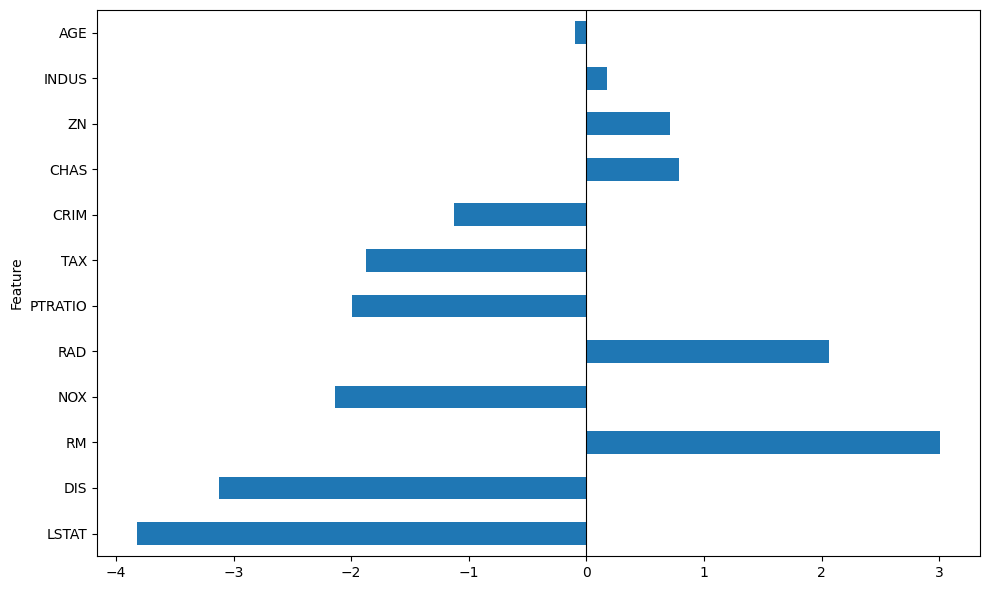

In [29]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coeficiente': lr_model.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print(coef_df)

fig, ax = plt.subplots(figsize=(10, 6))
coef_df.set_index('Feature')['Coeficiente'].plot(kind='barh', ax=ax)
ax.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.savefig('05_importancia_features.png', dpi=300)
plt.show()

In [30]:
def evaluate_model(y_true, y_pred, name=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name}: MAE=${mae:.4f}k | RMSE=${rmse:.4f}k | R²={r2:.4f}")
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

train_metrics = evaluate_model(y_train, y_train_pred, "Train")
test_metrics = evaluate_model(y_test, y_test_pred, "Test")


Train: MAE=$3.4245k | RMSE=$4.7544k | R²=0.7398

Test: MAE=$3.1114k | RMSE=$4.7726k | R²=0.6894


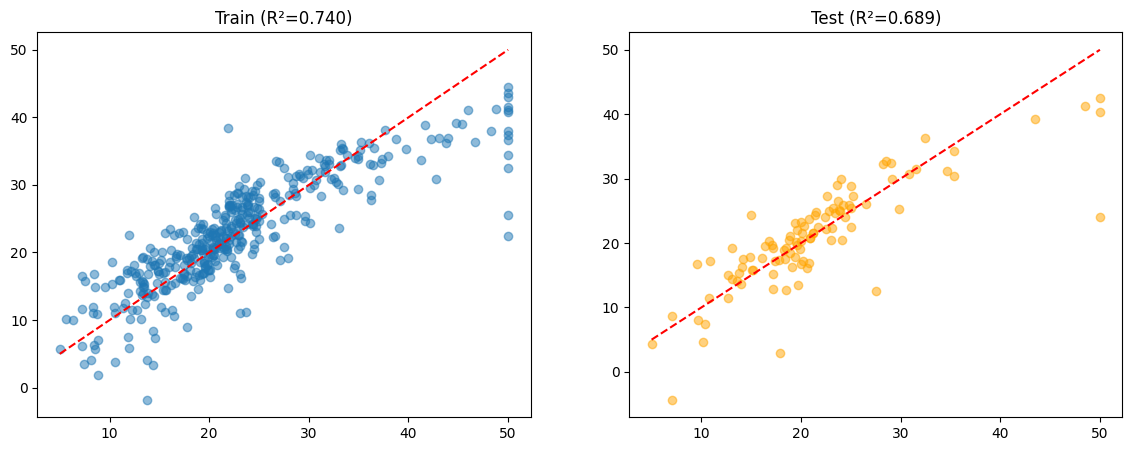

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].scatter(y_train, y_train_pred, alpha=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
axes[0].set_title(f'Train (R²={train_metrics["R2"]:.3f})')
axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_title(f'Test (R²={test_metrics["R2"]:.3f})')
plt.savefig('06_predicciones_vs_reales.png', dpi=300)
plt.show()

In [32]:
alphas = [0.1, 1.0, 10.0]
results = {'Linear Regression': test_metrics}

print("\n--- RIDGE ---")
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    results[f'Ridge (α={alpha})'] = evaluate_model(y_test, y_pred, f"Ridge α={alpha}")

print("\n--- LASSO ---")
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    results[f'Lasso (α={alpha})'] = evaluate_model(y_test, y_pred, f"Lasso α={alpha}")


--- RIDGE ---

Ridge α=0.1: MAE=$3.1110k | RMSE=$4.7730k | R²=0.6894

Ridge α=1.0: MAE=$3.1074k | RMSE=$4.7761k | R²=0.6889

Ridge α=10.0: MAE=$3.0859k | RMSE=$4.8055k | R²=0.6851

--- LASSO ---

Lasso α=0.1: MAE=$3.1677k | RMSE=$4.9410k | R²=0.6671

Lasso α=1.0: MAE=$3.4592k | RMSE=$5.2301k | R²=0.6270

Lasso α=10.0: MAE=$6.2558k | RMSE=$8.6629k | R²=-0.0233



COMPARACIÓN DE MODELOS


,MAE,MSE,RMSE,R2
Linear Regression,3.111377,22.777709,4.772600,0.689397
Ridge (α=0.1),3.110950,22.781053,4.772950,0.689351
Ridge (α=1.0),3.107353,22.811119,4.776099,0.688941
Ridge (α=10.0),3.085876,23.092580,4.805474,0.685103
Lasso (α=0.1),3.167675,24.413605,4.941013,0.667089
Lasso (α=1.0),3.459161,27.353830,5.230089,0.626996
Lasso (α=10.0),6.255844,75.045430,8.662877,-0.023341


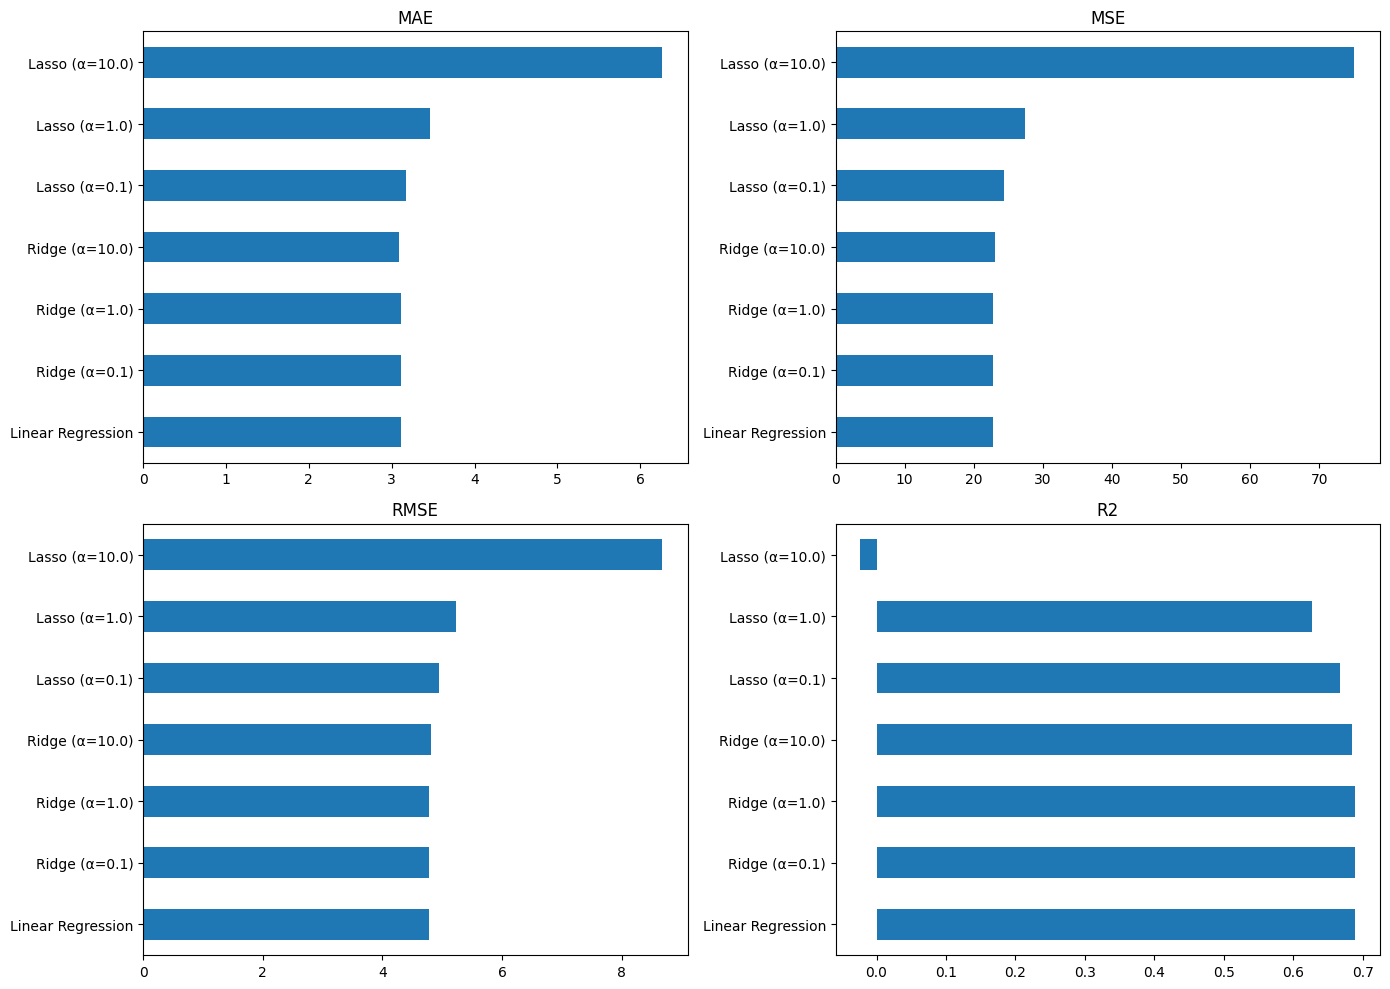

In [33]:
results_df = pd.DataFrame(results).T
print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS")
print("="*70)
display(results_df)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for idx, metric in enumerate(['MAE', 'MSE', 'RMSE', 'R2']):
    ax = axes[idx // 2, idx % 2]
    results_df[metric].plot(kind='barh', ax=ax)
    ax.set_title(f'{metric}')
plt.tight_layout()
plt.savefig('08_comparacion_modelos.png', dpi=300)
plt.show()

In [34]:
best_model = results_df['R2'].idxmax()
print(f"\n✓ MEJOR MODELO: {best_model}")
print(f"  R²: {results_df.loc[best_model, 'R2']:.4f}")
print(f"  RMSE: ${results_df.loc[best_model, 'RMSE']:.4f}k")
print(f"  Features clave: {', '.join(coef_df.head(3)['Feature'].values)}")


✓ MEJOR MODELO: Linear Regression
  R²: 0.6894
  RMSE: $4.7726k
  Features clave: LSTAT, DIS, RM
